### 7주차 강의

In [ ]:
import numpy as np

In [ ]:
# 유용한 ufunc (1)

# np.subtract
print(np.subtract(1.0, 4.0))
print('='*30)

arr1 = np.arange(9.0).reshape((3, 3)) # shape (3,3)
arr2 = np.arange(3.0)                 # shape (3,)
print(arr1), print('-'*30)
print(arr2), print('-'*30)

print(np.subtract(arr1, arr2))

-3.0
[[0. 1. 2.]
 [3. 4. 5.]
 [6. 7. 8.]]
------------------------------
[0. 1. 2.]
------------------------------
[[0. 0. 0.]
 [3. 3. 3.]
 [6. 6. 6.]]


In [ ]:
# 유용한 ufunc (2)

# np.power
arr1 = range(6)
a = np.power(arr1, 3)
print(list(arr1)), print('-'*30)
print(a), print('='*30)

arr2 = [1.0, 2.0, 3.0, 3.0, 2.0, 1.0]
b = np.power(arr1, arr2)
print(list(arr1)), print('-'*30)
print(arr2), print('-'*30)
print(b), print('='*30)

# 유니버셜 함수에 브로드캐스팅을 적용할 수 있음
arr3 = np.array([[1, 2, 3, 3, 2, 1],
                 [1, 2, 3, 3, 2, 1]])
c = np.power(arr1, arr3)
print(arr3), print('-'*30)
print(c)

[0, 1, 2, 3, 4, 5]
------------------------------
[  0   1   8  27  64 125]
[0, 1, 2, 3, 4, 5]
------------------------------
[1.0, 2.0, 3.0, 3.0, 2.0, 1.0]
------------------------------
[ 0.  1.  8. 27. 16.  5.]
[[1 2 3 3 2 1]
 [1 2 3 3 2 1]]
------------------------------
[[ 0  1  8 27 16  5]
 [ 0  1  8 27 16  5]]


In [ ]:
# 유용한 ufunc (3)

# 삼각 함수 (입력이 radian 이어야 함)

# np.sin, np.cos, np.tan
print(f'np.sin(np.pi/2): {np.sin(np.pi/2)}')
print(f'np.cos(np.pi): {np.cos(np.pi)}')
print('-'*60)

# deg2rad -> 각도를 라디안으로 바꿔주는 함수. 기억 안나면 공식 써도 됨
print(f'np.sin(np.deg2rad(0)): {np.sin(np.deg2rad(0))}')
print(f'np.tan(np.deg2rad(90)): {np.tan(np.deg2rad(90))}') # 무한대
print('-'*60)

# rad2deg (예상했던 결과는 -1인데...) -> 라디안을 각도로 변환
print(f'np.cos(np.rad2deg(np.pi)): {np.cos(np.rad2deg(np.pi))}') # 실수할 수 있는 부분 / 각도가 들어가면 안되는데, 들어가서 예상 결과와 다름.
print('-'*60)

print(np.sin(np.array((0., 30., 45., 60., 90.))*np.pi/180.)) # 180도에 해당하는 것 = pi / 비례식 관련 공식 생각해보기

np.sin(np.pi/2): 1.0
np.cos(np.pi): -1.0
------------------------------------------------------------
np.sin(np.deg2rad(0)): 0.0
np.tan(np.deg2rad(90)): 1.633123935319537e+16
------------------------------------------------------------
np.cos(np.rad2deg(np.pi)): -0.5984600690578581
------------------------------------------------------------
[0.         0.5        0.70710678 0.8660254  1.        ]


In [ ]:
# 유용한 ufunc (4)

# binary 연산 - 2개의 숫자(0 또는 1)로 이루어진 연산 / 연산자 계산법 다시 보기

# 13 : 0000 1101
# 17 : 0001 0001
a = np.bitwise_and(13, 17)  # 1   -> and 연산 => 1로 나옴 (이진수로 바뀌어 나옴; 0000 0001 = 1)
b = np.bitwise_or(13, 17)   # 29  -> or 연산 => 0001 1101 = 29
c = np.bitwise_xor(13, 17)  # 28  -> xor 연산 => 0001 1100 = 28
print(f'a: {a}, b: {b}, c: {c}')
print('-'*20)

# binary_repr (representation)은 10진수를 2진수로 변환
# 비트 수(width)를 지정하지 않으면 가장 짧은 형태로 표현
print(np.binary_repr(17)) # repr : 어떤 역할인지만 알아두면 됨, 잘 안나옴 (10진수 -> 2진수 변환)
print(np.binary_repr(17, width=8))
print('-'*20)

# 14 : 0000 1110
# 3  : 0000 0011
# 13 : 0000 1101
print(np.bitwise_and([14, 3], 13)) # 브로트캐스팅 14 & 13, 3 & 13
#((2, ), (scolar)) = np.bitwise_and([14, 3], 13))

a: 1, b: 29, c: 28
--------------------
10001
00010001
--------------------
[12  1]


In [ ]:
# 뷰 (view) (1)

# 메모리 공유
a = np.array([1, 2, 3, 4])
b = a.view()  # b는 a의 view

b[0] = 99
print(f'b : {b}')
print(f'a : {a}') # [99  2  3  4] -> 원본도 바뀜!


b : [99  2  3  4]
a : [99  2  3  4]


In [ ]:
# 뷰 (view) (2)

# 뷰 생성 방법(1) : 슬라이싱
arr = np.arange(10) # [0 1 2 3 4 5 6 7 8 9]
print(arr), print('-'*20)

# v1 & v2는 arr의 view 임
v1 = arr[1:2]
print(v1), print('-'*20)  # [1]
arr[1] = 2
print(v1), print('-'*20)  # [2]
print(arr), print('='*20) # [0 2 2 3 4 5 6 7 8 9]

v2 = arr[1::3]
print(v2), print('-'*20)  # [2 4 7]
arr[7] = 10
print(v2), print('-'*20)  # [2 4 10]
print(arr)      # [0 2 2 3 4 5 6 10 8 9]

[0 1 2 3 4 5 6 7 8 9]
--------------------
[1]
--------------------
[2]
--------------------
[0 2 2 3 4 5 6 7 8 9]
[2 4 7]
--------------------
[ 2  4 10]
--------------------
[ 0  2  2  3  4  5  6 10  8  9]


In [ ]:
# 뷰 (view) (3)

# 뷰 생성 방법(2) : dtype을 변경하는 dtype view로 생성
arr1 = np.zeros(2, dtype=np.uint16)
arr2 = arr1.view(np.uint8)
arr3 = arr1.view(np.uint32)

print(f'arr1: {arr1}, {arr1.dtype}')  # [0 0] uint16

# 바이트 단위로 쪼개져서 출력됨
print(f'arr2: {arr2}, {arr2.dtype}')  # [0 0 0 0] uint8

# 바이트 단위로 합쳐서 출력됨
print(f'arr3: {arr3}, {arr3.dtype}')  # [0] uint32


# 참고) astype을 이용한 복사
arr4 = arr1.astype(np.uint8)
arr5 = arr1.astype(np.uint32)
print(f'arr4: {arr4}, {arr4.dtype}')  # [0 0] uint8
print(f'arr5: {arr5}, {arr5.dtype}')  # [0 0] uint32

arr1: [0 0], uint16
arr2: [0 0 0 0], uint8
arr3: [0], uint32
arr4: [0 0], uint8
arr5: [0 0], uint32


In [ ]:
# 뷰 (view) (4)

# 배열 요소의 타입이 작은 타입 <-> 큰 타입으로 변경 (1)
arr = np.arange(4, dtype=np.uint16).reshape(2, 2)
print(arr), print('-'*20)   # [[0 1], [2 3]]

print(arr.view(np.uint8))   # [[0 0 1 0], [2 0 3 0]]
print('-'*20)

print((arr*100).view(np.uint8)) # [[0 0 100 0], [200 0 44 1]]

[[0 1]
 [2 3]]
--------------------
[[0 0 1 0]
 [2 0 3 0]]
--------------------
[[  0   0 100   0]
 [200   0  44   1]]


In [ ]:
decimal_number = 300
hexadecimal_number = hex(decimal_number)
print(hexadecimal_number)  # 0x12c

0x12c


In [ ]:
# 뷰 (view) (5)

# strides
arr = np.arange(4, dtype=np.uint16).reshape(2, 2)
print(arr)          # [[0 1], [2 3]]
print(arr.strides)  # (4, 2)


[[0 1]
 [2 3]]
(4, 2)


In [ ]:
# 복사 (copy) (1)

# Boolean indexing
arr = np.arange(12).reshape(3, 4) - 3
print(arr), print('-'*60)

arr1 = arr[arr>0] # boolean indexing
print(arr1)       # [1 2 3 4 5 6 7 8]
print('-'*60)

arr1[:] = 0       # [:]은 원칙적으로 슬라이싱으로 view 반환.
                  # 그러나 1차원 배열에서는 copy 반환
print(arr1)       # [0 0 0 0 0 0 0 0]
print('-'*60)
print(arr), print('='*60)
print(np.may_share_memory(arr, arr1))

# arr2 = arr[:]
# arr2[:] = 0
# print(arr)
# print(np.may_share_memory(arr, arr2))

# Slicing
arr3 = arr[0, :]
print(arr3), print('-'*60)  # [-3 -2 -1  0]
arr3[:] = 0
print(arr3), print('-'*60)  # [0 0 0 0]
print(arr)  # [[0 0 0 0], [1 2 3 4], [5 6 7 8]]

[[-3 -2 -1  0]
 [ 1  2  3  4]
 [ 5  6  7  8]]
------------------------------------------------------------
[1 2 3 4 5 6 7 8]
------------------------------------------------------------
[0 0 0 0 0 0 0 0]
------------------------------------------------------------
[[-3 -2 -1  0]
 [ 1  2  3  4]
 [ 5  6  7  8]]
False
[[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]
True
[0 0 0 0]
------------------------------------------------------------
[0 0 0 0]
------------------------------------------------------------
[[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]


In [ ]:
# 복사 (copy) (2)

# view vs. copy
arr = np.arange(12).reshape(3, 4)
print(arr), print('-'*60)

# view
arr1 = arr[0, :]
print(arr1), print('='*60)  # [0 1 2 3]

# copy
arr2 = arr1[:].copy()
arr2[:] = 0
print(arr1), print('-'*60)  # [0 1 2 3]
print(arr2)                 # [0 0 0 0]

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
------------------------------------------------------------
[0 1 2 3]
[0 1 2 3]
------------------------------------------------------------
[0 0 0 0]


In [ ]:
# 배열 조작과 정렬(array manipulation and alignment)

# C우선 배치와 F우선 배치 (1)

arr = np.arange(12).reshape(3,4)

print(arr), print('-'*40)
print(arr.ravel(order='C')), print('-'*40)
print(arr.ravel(order='F')), print('='*40)

print(arr.reshape(2, 6)), print('-'*40)
print(arr.ravel(order='F').reshape(2, 6)), print('='*40)

arrT = arr.T
print(arrT), print('-'*40)
print(arrT.ravel(order='C')), print('-'*40)
print(arrT.ravel(order='F'))

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
----------------------------------------
[ 0  1  2  3  4  5  6  7  8  9 10 11]
----------------------------------------
[ 0  4  8  1  5  9  2  6 10  3  7 11]
[[ 0  1  2  3  4  5]
 [ 6  7  8  9 10 11]]
----------------------------------------
[[ 0  4  8  1  5  9]
 [ 2  6 10  3  7 11]]
[[ 0  4  8]
 [ 1  5  9]
 [ 2  6 10]
 [ 3  7 11]]
----------------------------------------
[ 0  4  8  1  5  9  2  6 10  3  7 11]
----------------------------------------
[ 0  1  2  3  4  5  6  7  8  9 10 11]


In [ ]:
# 배열 조작과 정렬(array manipulation and alignment)

# C우선 배치와 F우선 배치 (2)

arr = np.arange(6)
print(arr), print('-'*30)

# C 우선 배치
print(np.reshape(arr, (2, 3))), print('-'*30)

# C 우선 ravel() 적용 후 C 우선 reshape() 적용
print(np.ravel(arr))
print(np.reshape(np.ravel(arr), (2, 3))), print('='*30)

# F 우선 배치
print(np.reshape(arr, (2,3), order='F')), print('-'*30)

# F 우선 ravel() 적용 후 F 우선 reshape() 적용
print(np.ravel(arr, order='F'))
print(np.reshape(np.ravel(arr, order='F'), (2, 3), order='F'))


[0 1 2 3 4 5]
------------------------------
[[0 1 2]
 [3 4 5]]
------------------------------
[0 1 2 3 4 5]
[[0 1 2]
 [3 4 5]]
[[0 2 4]
 [1 3 5]]
------------------------------
[0 1 2 3 4 5]
[[0 2 4]
 [1 3 5]]


In [ ]:
# 배열 조작과 정렬(array manipulation and alignment)

# np.concatenate()

arr1 = np.array([[1, 2], [3, 4]])
arr2 = np.array([[5, 6]])
print(arr1), print('-'*30)
print(arr2), print('-'*30)
print(f'arr1 shape: {arr1.shape}')
print(f'arr2 shape: {arr2.shape}'), print('-'*30)

arr_axis0 = np.concatenate((arr1, arr2), axis=0)
arr_axis1 = np.concatenate((arr1, arr2.T), axis=1)
print(f'arr_axis0: \n {arr_axis0}'), print('-'*30)
print(f'arr_axis1: \n {arr_axis1}'), print('-'*30)

# 두 배열을 1차원으로 flatten 한 뒤, 단순히 concatenate
arr_axisNone = np.concatenate((arr1, arr2), axis=None)
print(f'arr_axisNone: \n {arr_axisNone}')

[[1 2]
 [3 4]]
------------------------------
[[5 6]]
------------------------------
arr1 shape: (2, 2)
arr2 shape: (1, 2)
------------------------------
arr_axis0: 
 [[1 2]
 [3 4]
 [5 6]]
------------------------------
arr_axis1: 
 [[1 2 5]
 [3 4 6]]
------------------------------
arr_axisNone: 
 [1 2 3 4 5 6]


In [ ]:
# 배열 조작과 정렬(array manipulation and alignment)

# np.concatenate()

arr1 = np.random.rand(2,3,4)
arr2 = np.random.randn(2,3,4)
print(arr1), print('-'*60)
print(arr2), print('-'*60)
print(f'arr1 shape: {arr1.shape}')
print(f'arr2 shape: {arr2.shape}'), print('-'*60)

arr_axis0 = np.concatenate((arr1, arr2), axis=0)
print(f'arr_axis0 shape: {arr_axis0.shape}')
print(f'arr_axis0: \n {arr_axis0}'), print('-'*60)
arr_axis1 = np.concatenate((arr1, arr2), axis=1)
print(f'arr_axis1 shape: {arr_axis1.shape}')
print(f'arr_axis1: \n {arr_axis1}'), print('-'*60)
arr_axis2 = np.concatenate((arr1, arr2), axis=2)
print(f'arr_axis2 shape: {arr_axis2.shape}')
print(f'arr_axis2: \n {arr_axis2}'), print('-'*60)

[[[0.7163033  0.24640273 0.58277461 0.18720079]
  [0.28570761 0.25987033 0.67619577 0.45892556]
  [0.12677065 0.19172686 0.33286629 0.52341994]]

 [[0.11689602 0.06991695 0.70444514 0.82919225]
  [0.73652079 0.15229665 0.68163837 0.12234761]
  [0.55429646 0.02113269 0.7716156  0.71626986]]]
------------------------------------------------------------
[[[-0.72788424  1.53868993  0.4088704  -0.11344969]
  [ 1.06137626  1.72968516 -1.08032053  1.73449908]
  [ 0.08343583 -0.5883127  -0.32098887  0.46851055]]

 [[-0.69596468 -0.39641027  1.27374458 -0.07969525]
  [-0.97463916  1.13858701 -1.79700403 -0.73398791]
  [-0.71757147 -1.83829972 -1.28684745  0.46937347]]]
------------------------------------------------------------
arr1 shape: (2, 3, 4)
arr2 shape: (2, 3, 4)
------------------------------------------------------------
arr_axis0 shape: (4, 3, 4)
arr_axis0: 
 [[[ 0.7163033   0.24640273  0.58277461  0.18720079]
  [ 0.28570761  0.25987033  0.67619577  0.45892556]
  [ 0.12677065  0.191

In [ ]:
# 배열 조작과 정렬(array manipulation and alignment)

# np.vstack() => np.concatenate()의 axis=0과 같음
arr1 = np.array([[1, 2], [3, 4]])
arr2 = np.array([[5, 6]])

arr_vstack = np.vstack((arr1, arr2))
print(arr_vstack), print('-'*10)

arr3 = np.array([1, 2, 3])  # shape (3,)
arr4 = np.array([2, 3, 4])  # shape (3,)
print(np.vstack((arr3, arr4)))  # shape이 (1,3)으로 변형한 후, vstack
print('-'*10)

arr5 = np.array([[1], [2], [3]])  # shape (3,1)
arr6 = np.array([[2], [3], [4]])  # shape (3,1)
print(np.vstack((arr5, arr6)))

[[1 2]
 [3 4]
 [5 6]]
----------
[[1 2 3]
 [2 3 4]]
----------
[[1]
 [2]
 [3]
 [2]
 [3]
 [4]]


In [ ]:
# 배열 조작과 정렬(array manipulation and alignment)

# np.hstack() => np.concatenate()의 axis=1과 같음
arr1 = np.array([[1, 2], [3, 4]])
arr2 = np.array([[5, 6]])

arr_hstack = np.hstack((arr1, arr2.T))
print(arr_hstack), print('-'*20)

arr3 = np.array((1, 2, 3))      # shape (3,)
arr4 = np.array((2, 3, 4))      # shape (3,)
print(np.hstack((arr3, arr4))), print('-'*20)

arr5 = np.array([[1], [2], [3]])  # shape (3,1)
arr6 = np.array([[2], [3], [4]])  # shape (3,1)
print(np.hstack((arr5, arr6)))

[[1 2 5]
 [3 4 6]]
--------------------
[1 2 3 2 3 4]
--------------------
[[1 2]
 [2 3]
 [3 4]]


In [ ]:
# 배열 조작과 정렬(array manipulation and alignment)

# numpy.stack(arrays, axis=0) 함수
#     arrays : 같은 shape을 가지는 배열들의 리스트/튜플
#     axis : 새로운 축을 생성하면서 쌓은 (기본은 axis=0)

arrays = [np.random.randn(3, 4) for _ in range(10)]
print(len(arrays))
print(arrays)
print(arrays[0])

stack_axis0 = np.stack(arrays, axis=0) # 각 배열을 0번 축으로 쌓기
print(stack_axis0.shape)

stack_axis1 = np.stack(arrays, axis=1) # 각 배열을 1번 축으로 쌓기
print(stack_axis1.shape)

stack_axis2 = np.stack(arrays, axis=2) # 각 배열을 2번 축으로 쌓기
print(stack_axis2.shape)

arr1 = np.array([1, 2, 3])  # shape (3,)
arr2 = np.array([2, 3, 4])  # shape (3,)
print(np.stack((arr1, arr2)))           # default: axis=0
print(np.stack((arr1, arr2), axis=-1))  # axis=-1은 마지막 축. axis=1과 동일


10
[array([[ 0.05500868, -0.44126099, -0.28434629, -1.59485079],
       [ 0.25340565, -1.71095623, -1.52385382,  2.05347195],
       [-0.54090259,  0.76074009, -2.06247063,  0.94614696]]), array([[ 1.96820299,  2.0509924 , -0.69253228, -0.69525867],
       [ 0.03381723, -1.18035386, -2.03811435,  0.287061  ],
       [ 0.1726885 , -0.30585635, -0.44407464,  1.48971249]]), array([[-0.18973902,  0.7280194 , -0.16500139,  0.03034546],
       [-0.26154428, -0.41200995,  0.59955097,  1.26640997],
       [ 0.52628333, -0.28557081, -0.32421311,  0.18080907]]), array([[-1.15723303, -0.17574001, -0.37457803,  1.01894208],
       [-0.99033123, -0.14680634,  0.40009626,  0.60181747],
       [ 0.43196274,  0.64686338,  0.3831276 ,  0.29858084]]), array([[ 0.21828432,  1.48918914, -0.24372045, -1.80616201],
       [ 0.69759287,  0.40348247,  0.58905186, -2.02188316],
       [-1.88081836,  0.67172452,  1.78322494, -1.0879974 ]]), array([[ 0.23074455,  0.84064709,  0.02917547,  1.04580839],
       [ 1

In [ ]:
# 배열 조작과 정렬(array manipulation and alignment)

# 정렬 np.sort(a, axis=-1, kind= 'quicksort', order=None)
#   axis : 정렬할 축 (-1은 마지막 축, None 이면 전체를 1D로 정렬)
#   order : 구조화 배열일 때, 정렬 기준 필드 이름

arr = np.array([[1, 4], [3, 1]])
print(arr), print('-'*30)

# default는 axis=-1, 마지막 축을 따라 정렬
print(np.sort(arr)), print('-'*30)  # [[1 4], [1 3]]
arr.sort()
print(arr), print('-'*30)           # [[1 4], [1 3]]

# 배열 전체를 flatten한 후 정렬
print(np.sort(arr, axis=None)), print('-'*30)
# arr.sort(axis=None) ==> 에러 발생

# 첫 번째 축을 따라 정렬
print(np.sort(arr, axis=0)) # [[1 3], [1 4]]
print('-'*30)
arr.sort(axis=0)
print(arr)                  # [[1 3], [1 4]]

[[1 4]
 [3 1]]
------------------------------
[[1 4]
 [1 3]]
------------------------------
[[1 4]
 [1 3]]
------------------------------
[1 1 3 4]
------------------------------
[[1 3]
 [1 4]]
------------------------------
[[1 3]
 [1 4]]


In [ ]:
# 배열 조작과 정렬(array manipulation and alignment)

# 정렬

# 구조화된 배열 정렬 ==> order 키워드로 정렬할 필드 지정
dtype = [('name', 'S10'), ('height', float), ('age',int)]
values = [('Liz', 171, 22), ('Vickie', 173, 22), ('Haha', 169, 47)]
arr = np.array(values, dtype=dtype)   # 구조화된 배열 생성

print(np.sort(arr, order='height')), print('-'*70)

# age가 같을 경우, height를 기준으로 정렬
print(np.sort(arr, order=['age', 'height']))

[(b'Haha', 169., 47) (b'Liz', 171., 22) (b'Vickie', 173., 22)]
----------------------------------------------------------------------
[(b'Liz', 171., 22) (b'Vickie', 173., 22) (b'Haha', 169., 47)]


In [ ]:
# 배열 조작과 정렬(array manipulation and alignment)

# 정렬

# numpy.argsort(): 1차원 배열
arr = np.array([3, 1, 2])
sorted_by_index = np.argsort(arr)
print(sorted_by_index)

for i in sorted_by_index:
  print(arr[i])

print('='*10)

# numpy.argsort(): 2차원 배열
arr = np.array([[0, 3], [2, 2]])
print(arr), print('-'*10)
print(np.argsort(arr, axis=0))   # 첫 번째 축을 따라 정렬
print('-'*10)
print(np.argsort(arr, axis=1))   # 마지막 축을 따라 정렬


[1 2 0]
1
2
3
[[0 3]
 [2 2]]
----------
[[0 1]
 [1 0]]
----------
[[0 1]
 [0 1]]


In [ ]:
# 배열 조작과 정렬(array manipulation and alignment)

# 정렬

# 구조화된 배열의 order 키워드로 배열 정렬

# arr은 2개의 필드('x','y')를 가지는 1차원 튜플
# arr[0]=(x=1, y=0), arr[1]=(x=0, y=1) 구조와 같음
arr = np.array([(1,0), (0,1)], dtype=[('x', '<i4'), ('y','<i4')])
print(arr), print('-'*20)

# order를 명시하지 않았기 때문에, 구조화 배열의 첫 번째 필드('x') 기준으로 정렬
print(np.argsort(arr)), print('-'*20)

# x 값 기준 정렬하고 x 값이 같으면 y 기준으로 정렬
print(np.argsort(arr, order=('x','y'))), print('-'*20)

# y 값 기준 정렬하고 y 값이 같으면 x 기준으로 정렬
print(np.argsort(arr, order=('y','x')))
print('='*30)


arr = np.array([(1, 9), (5, 4), (1, 0), (4, 4),(3, 0), (4,2), (4, 1)],
                dtype = np.dtype([('x', int), ('y', int)]))
print(np.argsort(arr))     # 또는 np.argsort(arr, order=('x','y'))


(2,)
--------------------
[1 0]
--------------------
[1 0]
--------------------
[0 1]
[2 0 4 6 5 3 1]


In [ ]:
# 배열 조작과 정렬(array manipulation and alignment)

# 정렬

# numpy.lexsort( )
arr1 = np.array([3, 4, 2, 1])   # 보조키
arr2 = np.array([2, 2, 1, 1])   # 우선키 (2,3,0,1): 2,3과 0,1의 키가 같음
arr = np.lexsort((arr1, arr2))
print(arr), print('-'*50)

# 첫 번째로 성, 그 다음은 이름으로 정렬
surnames = ('Jang','Song','Lee', 'Lee')
first_names = ('Wonyoung','Hayoung','Chaeyoung','Seo')
ind = np.lexsort((first_names, surnames))
print(ind), print('-'*50)

print([surnames[i] + "," + first_names[i] for i in ind])
print('-'*50)

# 숫자들로 구성된 a와 b를 인수로 정렬
a = [1, 5, 1, 4, 3, 4, 4]     # 첫 번째 열
b = [9, 4, 0, 4, 0, 2, 1]     # 두 번째 열
ind = np.lexsort((b, a))      # a에 의해 정렬한 다음 b에 의해 정렬
print(ind), print('-'*50)
print([(a[i], b[i]) for i in ind])

print([(a[i], b[i]) for i in np.argsort(a)])


[3 2 0 1]
--------------------------------------------------
[0 2 3 1]
--------------------------------------------------
['Jang,Wonyoung', 'Lee,Chaeyoung', 'Lee,Seo', 'Song,Hayoung']
--------------------------------------------------
[2 0 4 6 5 3 1]
--------------------------------------------------
[(1, 0), (1, 9), (3, 0), (4, 1), (4, 2), (4, 4), (5, 4)]
[(1, 9), (1, 0), (3, 0), (4, 4), (4, 1), (4, 2), (5, 4)]


(array([5, 3, 4, 2, 1]), array([  0,  20,  40,  60,  80, 100]))
[5 3 4 2 1]
[  0  20  40  60  80 100]


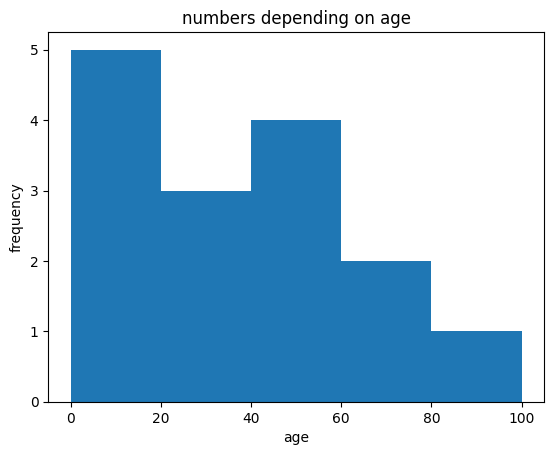

In [ ]:
# 배열 조작과 정렬(array manipulation and alignment)

# histogram
import matplotlib.pyplot as plt
import numpy as np

arr = np.array([15,16,16,17,19,20,22,35,43,45,55,59,60,75,88])
print(np.histogram(arr, bins=[0,20,40,60,80,100]))

a, b = np.histogram(arr, bins=[0,20,40,60,80,100])
print(a)
print(b)

plt.figure()
plt.hist(arr, bins=[0, 20, 40, 60, 80, 100])
plt.title('numbers depending on age')
plt.xlabel('age'), plt.ylabel('frequency')
plt.show()

In [ ]:
# 배열 연산 (array operation)

# 다차원 배열 연산

# 2차원 배열 연산
arr1 = np.array([[1, 2, 3], [4, 5, 6]], dtype=np.int32)
print(arr1)
print(arr1.sum(axis=0))
print(arr1.sum(axis=1)), print('='*30)

# 3차원 배열 연산
arr2 = np.arange(24).reshape(3, 2, 4)
print(arr2), print('-'*30)
print(arr2.shape), print('-'*30)
print(arr2.sum(axis=0)), print('-'*30)
print(arr2.sum(axis=1)), print('-'*30)
print(arr2.sum(axis=2))



[[1 2 3]
 [4 5 6]]
[5 7 9]
[ 6 15]
[[[ 0  1  2  3]
  [ 4  5  6  7]]

 [[ 8  9 10 11]
  [12 13 14 15]]

 [[16 17 18 19]
  [20 21 22 23]]]
------------------------------
(3, 2, 4)
------------------------------
[[24 27 30 33]
 [36 39 42 45]]
------------------------------
[[ 4  6  8 10]
 [20 22 24 26]
 [36 38 40 42]]
------------------------------
[[ 6 22]
 [38 54]
 [70 86]]


In [ ]:
# 배열 연산 (array operation)

# 넘파이와 리스트의 배열 연산 실행 속도 비교

import numpy as np
import random

n = 1000000

a = [random.random() for i in range(n)]
b = [random.random() for i in range(n)]

arr1 = np.array(a)
arr2 = np.array(b)
print(arr1.shape)

%timeit [a[j] + b[j] for j in range(n)] # 리스트 연산
%timeit arr1 + arr2   # 넘파이 연산

%timeit sum(a)        # 파이썬 sum() 함수
%timeit np.sum(arr1)  # 넘파이 np.sum() 함수
print('='*80)

# 100번 반복하고, 3세트 실행할 때
%timeit -n 100 -r 3 [a[j] + b[j] for j in range(n)] # 리스트 연산
%timeit -n 100 -r 3 arr1 + arr2   # 넘파이 연산

%timeit -n 100 -r 3 sum(a)        # 파이썬 sum() 함수
%timeit -n 100 -r 3 np.sum(arr1)  # 넘파이 np.sum() 함수


(1000000,)
67.6 ms ± 583 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
1.04 ms ± 200 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
7.3 ms ± 1.04 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
372 µs ± 94.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
59.4 ms ± 12.7 ms per loop (mean ± std. dev. of 3 runs, 100 loops each)
653 µs ± 84 µs per loop (mean ± std. dev. of 3 runs, 100 loops each)
4.58 ms ± 44.4 µs per loop (mean ± std. dev. of 3 runs, 100 loops each)
226 µs ± 11.6 µs per loop (mean ± std. dev. of 3 runs, 100 loops each)


In [ ]:
# 배열 연산 (array operation)

# 배열 반복
# 1차원 배열
arr = np.array([1, 3, 5, 7])
for i in arr:
  print(i)
print('-'*10)

# 2차원 배열
arr = np.arange(8).reshape(4, 2)
print(f'arr : \n {arr}')
for i in arr:
  print(i)
print('-'*10)

# 곱셈 연산 배열
arr = np.arange(8).reshape(4, 2)
for (a, b) in arr:
  print(a*b)


1
3
5
7
----------
arr : 
 [[0 1]
 [2 3]
 [4 5]
 [6 7]]
[0 1]
[2 3]
[4 5]
[6 7]
----------
0
6
20
42


In [ ]:
# 배열 연산 (array operation)

# random number generator

# np.random.rand()
a = np.random.rand(3, 2) # [0,1) 안에서 임의의 값 생성
print(a), print('='*30)

# np.random.randint()
b = np.random.randint(2, size=10)
c = np.random.randint(5, size=10)
d = np.random.randint(5, size=(2, 4))
print(b), print('-'*30)
print(c), print('-'*30)
print(d), print('='*30)

# np.random.choice()
e = np.random.choice(5, 3)  # [0,5)에서 임의의 샘플 추출
f = np.random.choice(5, 3, p=[0.1, 0, 0.3, 0.6, 0])
print(e), print('-'*30)
print(f), print('='*30)

arr = np.arange(12)
g = np.random.choice(arr, size=10, replace=True)  # 복원 추출
h = np.random.choice(arr, size=10, replace=False)
print(g), print('-'*30)
print(h), print('='*30)

arr_like = ['Karina','Winter','Giselle','Ningning']
i = np.random.choice(arr_like, 5, p=[0.4, 0.4, 0.15, 0.05])
print(i), print('='*30)

# np.random.randn(d0, d1, ..., dn)
# 표준 정규분포: 평균(mean) = 0, 표준편차(std) = 1
# 형태: 지정된 형태(shape)의 배열을 반환
print(np.random.randn())      # 스칼라 하나
print(np.random.randn(5))     # 1차원 배열
print(np.random.randn(3, 2))  # 2차원 배열
print('='*30)

# np.random.normal(loc=0.0, scale=1.0, size=None)
# loc : 정규 분포의 중심 위치 (평균)
# scale : 정규 분포의 표준 편차 (분포의 폭, 퍼짐 정도)
# size : 생성할 난수 개수 (예: 10) or shape (예: (3,4))
print(np.random.normal(0, 1, 5))
print(np.random.normal(100, 10, (3, 3)))

[[0.34487371 0.28440841]
 [0.53735507 0.16803239]
 [0.55981496 0.34984067]]
[1 0 1 1 1 0 0 0 0 1]
------------------------------
[4 2 2 2 1 0 1 1 1 4]
------------------------------
[[4 3 4 0]
 [0 3 4 4]]
[1 3 0]
------------------------------
[2 3 3]
[0 0 9 0 1 0 7 3 7 5]
------------------------------
[ 8  6  2 10  0  3  1 11  5  7]
['Karina' 'Karina' 'Karina' 'Karina' 'Winter']
1.5658695935435938
[-0.09901488 -0.13443923  0.06840746  0.24325299  0.21143179]
[[-0.38030175 -0.00703493]
 [-2.37645283 -0.65246344]
 [-1.1150246   0.52433353]]
[ 0.94041398 -0.74636866  1.0839804   2.34487219 -1.6148873 ]
[[117.04714331  99.15720521 107.27899851]
 [ 90.71065695 102.90127745  91.65978494]
 [ 96.33841466  90.1192818  106.8297241 ]]


In [3]:
# 브로드캐스팅 연산

# 우리나라 수능고사의 학력 분석 예시
arr = np.random.normal(loc=[70., 67., 59.],
                       scale = [5., 7., 9.], size = (5, 3))

print(arr), print('-'*50)

# shape (5, 3)인 arr에서 shape (3,)인 arr_avc를 뺀다.
arr_avc = arr.mean(axis = 0)
print(arr_avc), print('-'*50)

arr2 = arr - arr_avc
print(arr2), print('-'*50)

arr_avr = arr.mean(axis = 1)
print(arr_avr)

# 연산이 가능하도록 shape (5,)인 arr_avr의 차원을 (5, 1)로 늘려줌
print(arr_avr[:, np.newaxis]), print('-'*50)
arr3 = arr - arr_avr[:, np.newaxis]
print(arr3)

[[72.86579357 67.50156048 65.68246198]
 [71.59682853 59.56234406 57.49195626]
 [71.09143945 79.25918602 59.77140039]
 [70.47699738 59.67174367 44.80295739]
 [70.28025597 67.45541297 58.24725733]]
--------------------------------------------------
[71.26226298 66.69004944 57.19920667]
--------------------------------------------------
[[  1.60353059   0.81151104   8.48325531]
 [  0.33456555  -7.12770538   0.29274959]
 [ -0.17082353  12.56913658   2.57219372]
 [ -0.7852656   -7.01830577 -12.39624928]
 [ -0.98200701   0.76536353   1.04805066]]
--------------------------------------------------
[68.68327201 62.88370961 70.04067529 58.31723281 65.32764209]
[[68.68327201]
 [62.88370961]
 [70.04067529]
 [58.31723281]
 [65.32764209]]
--------------------------------------------------
[[  4.18252156  -1.18171153  -3.00081003]
 [  8.71311891  -3.32136556  -5.39175336]
 [  1.05076416   9.21851073 -10.2692749 ]
 [ 12.15976457   1.35451085 -13.51427542]
 [  4.95261388   2.12777088  -7.08038476]]


In [ ]:
# 선형 대수 (linear algebra)

# np.linalg.solve( ) 함수
# Ax = b 문제 풀기
a = np.array([[1, 2, 3], [2, 0, 1], [1, -1, 1]])
c = np.array([[-2, 4, -1]])
b = c.T
x = np.linalg.solve(a, b)
print(x), print('='*30)

# 3*x0 + x1 = 9와 x0 + 2*x1 = 8의 연립 방정식 풀기
a = np.array([[3, 1], [1, 2]])
b = np.array([9, 8])
x = np.linalg.solve(a, b)
print(x)


[[ 3.42857143]
 [ 1.57142857]
 [-2.85714286]]
[2. 3.]


In [ ]:
# 선형 대수 (linear algebra)

# dot product
# 1차원 벡터의 dot product
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])
print(np.dot(a, b)), print('='*30)


# 2차원 이상의 배열의 dot product
arr1 = np.array([[1, 2], [3, 4]])
arr2 = np.array([[4, 5], [6, 7]])
print(np.dot(arr1, arr2))
print(np.matmul(arr1, arr2)), print('='*30)

# 2차원 배열과 1차원 벡터의 dot product
c = np.array([2,1])
print(np.dot(arr1, c))
print(np.matmul(arr1, c))

32
[[16 19]
 [36 43]]
[[16 19]
 [36 43]]
[ 4 10]
[ 4 10]


In [ ]:
# input / output

# numpy.save() / numpy.load()
arr = np.arange(12).reshape(3, 4)
np.save('save_arr', arr)

np.load('save_arr.npy')


array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [ ]:
# input / output

# numpy.savez()
arr1 = np.arange(12).reshape(3, 4)
arr2 = arr1 * 1.1
np.savez('savez_arr', a = arr2, b = arr1)

np.load('savez_arr.npz')
arr_zp = np.load('savez_arr.npz')
print(arr_zp), print('-'*40)
print(arr_zp['a'])
print(arr_zp['b'])


NpzFile 'savez_arr.npz' with keys: a, b
----------------------------------------
[[ 0.   1.1  2.2  3.3]
 [ 4.4  5.5  6.6  7.7]
 [ 8.8  9.9 11.  12.1]]
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


In [ ]:
# input / output

# StringIO
import numpy as np
from io import StringIO

# 문자열을 파일처럼 읽기
f1 = StringIO("0 1 2\n3 4 5")

# 공백을 기준으로 구분된 숫자를 로딩
print(np.loadtxt(f1))

# 콤마로 구분된 숫자 로딩
f2 = StringIO("0, 1, 2\n3, 4, 5")
print(np.loadtxt(f2, delimiter=','))


[[0. 1. 2.]
 [3. 4. 5.]]
[[0. 1. 2.]
 [3. 4. 5.]]


In [ ]:
# input / output

# 배열을 텍스트 파일로 저장
arr1 = arr2 = arr3 = np.arange(0.0, 5.0, 1.0)
np.savetxt('test1.txt', arr1, delimiter=',')  # arr1은 배열
np.savetxt('test2.txt', (arr1,arr2,arr3))     # 동일 크기의 2D 배열
np.savetxt('test3.txt', arr1, fmt='%1.4e')    # 지수 표기

print(np.loadtxt('test1.txt')), print('-'*40)
print(np.loadtxt('test2.txt')), print('-'*40)
print(np.loadtxt('test3.txt'))


[0. 1. 2. 3. 4.]
----------------------------------------
[[0. 1. 2. 3. 4.]
 [0. 1. 2. 3. 4.]
 [0. 1. 2. 3. 4.]]
----------------------------------------
[0. 1. 2. 3. 4.]


In [ ]:
# input / output

# genfromtxt( ) 함수를 사용하여 데이터 파일을 읽어들임
arr1 = np.genfromtxt('./datafile.csv', delimiter=',')
print(arr1), print('='*40)

# 데이터 3개 열에 이름을 no1, no2, no3로 각각 붙여서 처리 하는 경우
arr2 = np.genfromtxt('./datafile.csv',
                     names=['no1','no2','no3'], delimiter=',')

print(arr2), print('-'*40)
print(arr2[0]), print('-'*40)
print(arr2.dtype), print('='*40)

# names 옵션을 사용하는 경우
arr3 = np.genfromtxt('./datafile.csv', names=True, delimiter=',')
print(arr3)


[[ 1.  2.  3.  4.  5.]
 [ 6.  7.  8.  9. 10.]
 [11. 12. 13. 14. 15.]]
[( 1.,  2.,  3.) ( 6.,  7.,  8.) (11., 12., 13.)]
----------------------------------------
(1.0, 2.0, 3.0)
----------------------------------------
[('no1', '<f8'), ('no2', '<f8'), ('no3', '<f8')]
[( 6.,  7.,  8.,  9., 10.) (11., 12., 13., 14., 15.)]
